In [1]:
# Loading libraris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Getting the path
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dirty-dataset-to-practice-data-cleaning/my_file (1).csv


In [2]:
path = '/kaggle/input/dirty-dataset-to-practice-data-cleaning/my_file (1).csv'

df = pd.read_csv(path)

df

,Rank,Peak,All Time Peak,Actual gross,Adjusted gross (in 2022 dollars),Artist,Tour title,Year(s),Shows,Average gross,Ref.
0,1,1,2,"$780,000,000","$780,000,000",Taylor Swift,The Eras Tour †,2023–2024,56,"$13,928,571",[1]
1,2,1,7[2],"$579,800,000","$579,800,000",Beyoncé,Renaissance World Tour,2023,56,"$10,353,571",[3]
2,3,1[4],2[5],"$411,000,000","$560,622,615",Madonna,Sticky & Sweet Tour ‡[4][a],2008–2009,85,"$4,835,294",[6]
3,4,2[7],10[7],"$397,300,000","$454,751,555",Pink,Beautiful Trauma World Tour,2018–2019,156,"$2,546,795",[7]
4,5,2[4],NaN,"$345,675,146","$402,844,849",Taylor Swift,Reputation Stadium Tour,2018,53,"$6,522,173",[8]
5,6,2[4],10[9],"$305,158,363","$388,978,496",Madonna,The MDNA Tour,2012,88,"$3,467,709",[9]
6,7,2[10],NaN,"$280,000,000","$381,932,682",Celine Dion,Taking Chances World Tour,2008–2009,131,"$2,137,405",[11]
7,7,NaN,NaN,"$257,600,000","$257,600,000",Pink,Summer Carnival †,2023–2024,41,"$6,282,927",[12]
8,9,NaN,NaN,"$256,084,556","$312,258,401",Beyoncé,The Formation World Tour,2016,49,"$5,226,215",[13]
9,10,NaN,NaN,"$250,400,000","$309,141,878",Taylor Swift,The 1989 World Tour,2015,85,"$2,945,882",[14]


### Checking the structure of the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Rank                              20 non-null     int64 
 1   Peak                              9 non-null      object
 2   All Time Peak                     6 non-null      object
 3   Actual gross                      20 non-null     object
 4   Adjusted gross (in 2022 dollars)  20 non-null     object
 5   Artist                            20 non-null     object
 6   Tour title                        20 non-null     object
 7   Year(s)                           20 non-null     object
 8   Shows                             20 non-null     int64 
 9   Average gross                     20 non-null     object
 10  Ref.                              20 non-null     object
dtypes: int64(2), object(9)
memory usage: 1.8+ KB


### Standardizing the names of all the columns

In [4]:
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(r"\s+", "_", regex=True)
)

df.columns

Index(['rank', 'peak', 'all_time_peak', 'actual_gross',
       'adjusted_gross_(in_2022_dollars)', 'artist', 'tour_title', 'year(s)',
       'shows', 'average_gross', 'ref.'],
      dtype='object')

### Checking for unique values in each column

In [5]:
for i in df.columns:
    print(f'{i}:\n {df[i].unique()}\n')

rank:
 [ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20]

peak:
 ['1' '1[4]' '2[7]' '2[4]' '2[10]' nan '1[20]' '2[c]']

all_time_peak:
 ['2' '7[2]' '2[5]' '10[7]' nan '10[9]' '14[17]']

actual_gross:
 ['$780,000,000' '$579,800,000' '$411,000,000' '$397,300,000'
 '$345,675,146' '$305,158,363' '$280,000,000' '$257,600,000'
 '$256,084,556' '$250,400,000' '$229,100,000[b]' '$227,400,000'
 '$204,000,000' '$200,000,000' '$194,000,000' '$184,000,000'
 '$170,000,000' '$169,800,000' '$167,700,000[e]' '$150,000,000']

adjusted_gross_(in_2022_dollars):
 ['$780,000,000' '$579,800,000' '$560,622,615' '$454,751,555'
 '$402,844,849' '$388,978,496' '$381,932,682' '$257,600,000'
 '$312,258,401' '$309,141,878' '$283,202,896' '$295,301,479'
 '$251,856,802' '$299,676,265' '$281,617,035' '$227,452,347'
 '$213,568,571' '$207,046,755' '$204,486,106' '$185,423,109']

artist:
 ['Taylor Swift' 'Beyoncé' 'Madonna' 'Pink' 'Celine Dion' 'Lady Gaga'
 'Katy Perry' 'Cher' 'Adele']

tour_title:
 ['The Eras To

In [6]:
df['actual_gross'] = (
    df['actual_gross']
    .replace({'\$': '', ',': ''}, regex=True)
    .str.replace(r'\D', '', regex=True)        # remove any remaining non-digit chars
    .astype(int)
)

df['adjusted_gross_(in_2022_dollars)'] = (
    df['adjusted_gross_(in_2022_dollars)']
    .replace({'\$': '', ',': ''}, regex=True)
    .astype(int)
)

df['average_gross'] = (
    df['average_gross']
    .replace({'\$': '', ',': ''}, regex=True)
    .astype(int)
)


print(df['actual_gross'])
print(df['adjusted_gross_(in_2022_dollars)'])
print(df['average_gross'])

0     780000000
1     579800000
2     411000000
3     397300000
4     345675146
5     305158363
6     280000000
7     257600000
8     256084556
9     250400000
10    229100000
11    227400000
12    204000000
13    200000000
14    194000000
15    184000000
16    170000000
17    169800000
18    167700000
19    150000000
Name: actual_gross, dtype: int64
0     780000000
1     579800000
2     560622615
3     454751555
4     402844849
5     388978496
6     381932682
7     257600000
8     312258401
9     309141878
10    283202896
11    295301479
12    251856802
13    299676265
14    281617035
15    227452347
16    213568571
17    207046755
18    204486106
19    185423109
Name: adjusted_gross_(in_2022_dollars), dtype: int64
0     13928571
1     10353571
2      4835294
3      2546795
4      6522173
5      3467709
6      2137405
7      6282927
8      5226215
9      2945882
10     1735606
11     1118227
12     1350993
13      615385
14     3233333
15     1295775
16     1734694
17     2070732
18  

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:16: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:16: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_17/2920741907.py:3: SyntaxWarning: invalid escape sequence '\$'
  .replace({'\$': '', ',': ''}, regex=True)
/tmp/ipykernel_17/2920741907.py:10: SyntaxWarning: invalid escape sequence '\$'
  .replace({'\$': '', ',': ''}, regex=True)
/tmp/ipykernel_17/2920741907.py:16: SyntaxWarning: invalid escape sequence '\$'
  .replace({'\$': '', ',': ''}, regex=True)


In [7]:
df = df[['actual_gross', 'artist', 'average_gross']]

df

,actual_gross,artist,average_gross
0,780000000,Taylor Swift,13928571
1,579800000,Beyoncé,10353571
2,411000000,Madonna,4835294
3,397300000,Pink,2546795
4,345675146,Taylor Swift,6522173
5,305158363,Madonna,3467709
6,280000000,Celine Dion,2137405
7,257600000,Pink,6282927
8,256084556,Beyoncé,5226215
9,250400000,Taylor Swift,2945882


### Data Visualization

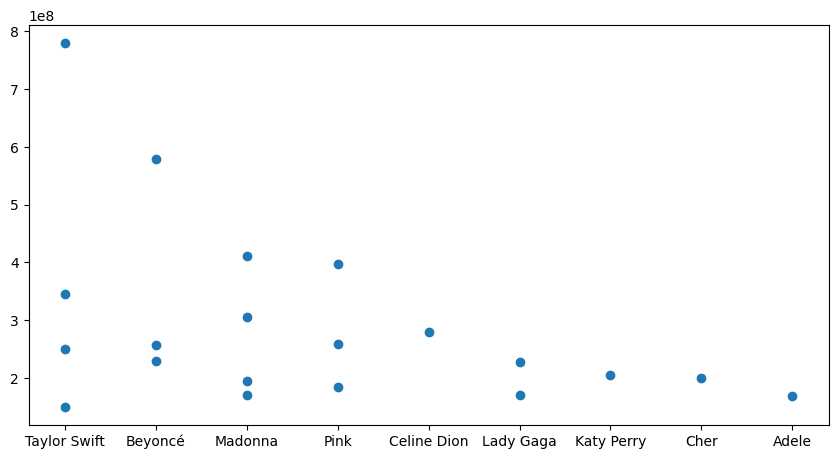

In [8]:
fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([1,1,1,1])
axes.scatter(df['artist'], df['actual_gross']);

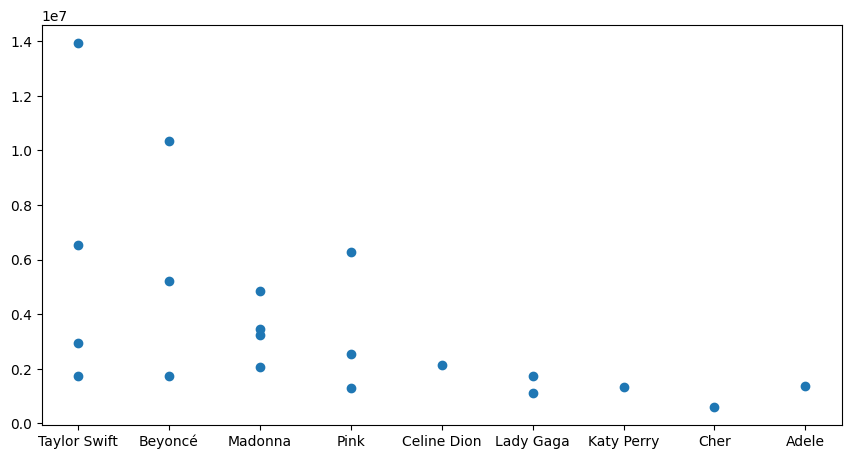

In [9]:
fig = plt.figure(figsize=(8,4))
axes = fig.add_axes([1,1,1,1])
axes.scatter(df['artist'], df['average_gross']);

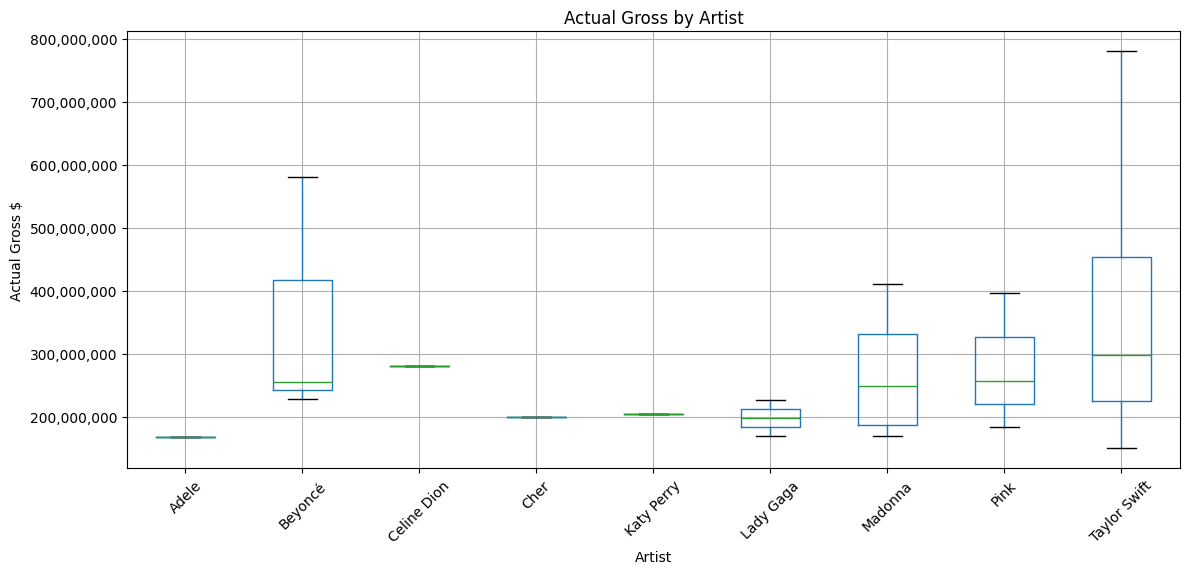

In [10]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(12, 6))

df.boxplot(
    column='actual_gross',
    by='artist',
    ax=ax
)

ax.set_xlabel('Artist')
ax.set_ylabel('Actual Gross $')
plt.suptitle('')  # remove automatic title
ax.set_title('Actual Gross by Artist')

plt.xticks(rotation=45)

# Format y-axis with commas
ax.get_yaxis().set_major_formatter(
    mtick.FuncFormatter(lambda x, p: format(int(x), ','))
)

plt.tight_layout()
plt.show()

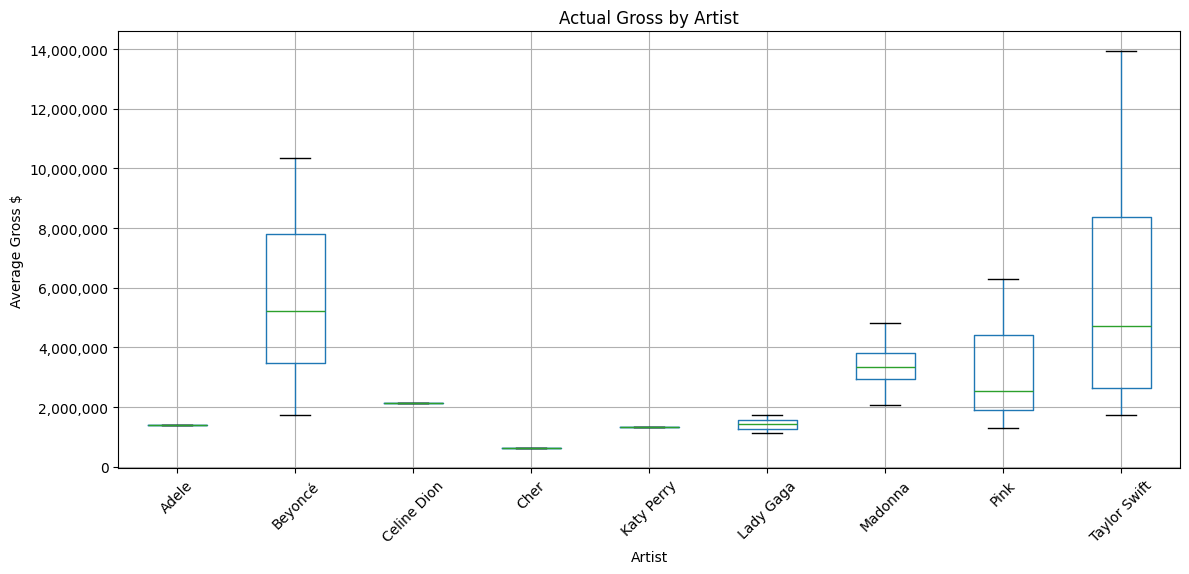

In [11]:
import matplotlib.ticker as mtick

fig, ax = plt.subplots(figsize=(12, 6))

df.boxplot(
    column='average_gross',
    by='artist',
    ax=ax
)

ax.set_xlabel('Artist')
ax.set_ylabel('Average Gross $')
plt.suptitle('')  # remove automatic title
ax.set_title('Actual Gross by Artist')

plt.xticks(rotation=45)

# Format y-axis with commas
ax.get_yaxis().set_major_formatter(
    mtick.FuncFormatter(lambda x, p: format(int(x), ','))
)

plt.tight_layout()
plt.show()